## Chapter 3 Notes

For the purpose of chapter 3, we will be using using the breast_cancer_data. This data is a common dataset and will be used in this lesson to demonstrate the importance of scaling the dataset.

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


First step is to instantiate a scaler. An example of the scaler used is the MinMaxScaler(); however, there are other scalers to explore such as:
+  RobustScaler()
+  StandardScaler()
+  Normalizer()

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

The next step is to fit the scaler to the training data as follow:

In [26]:
scaler.fit(X_train)

MinMaxScaler()

Use the transform attribute of the instantiated scaler object to scale the training data.

In [27]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


If we transform the training data, we also need to scale the test data. It is important to note that we should not refit the scaler to the test data. We only need use the fitted scaler on the training data to also transform the test data.

In [28]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


The following illustrates the original data, properly scaled data, and improperly scaled data. 

C:\Users\drsha\AppData\Local\Temp\ipykernel_14184\1856548622.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\drsha\AppData\Local\Temp\ipykernel_14184\1856548622.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\drsha\AppData\Local\Temp\ipykernel_14184\1856548622.py:14: UserWarning: *c* argument looks 

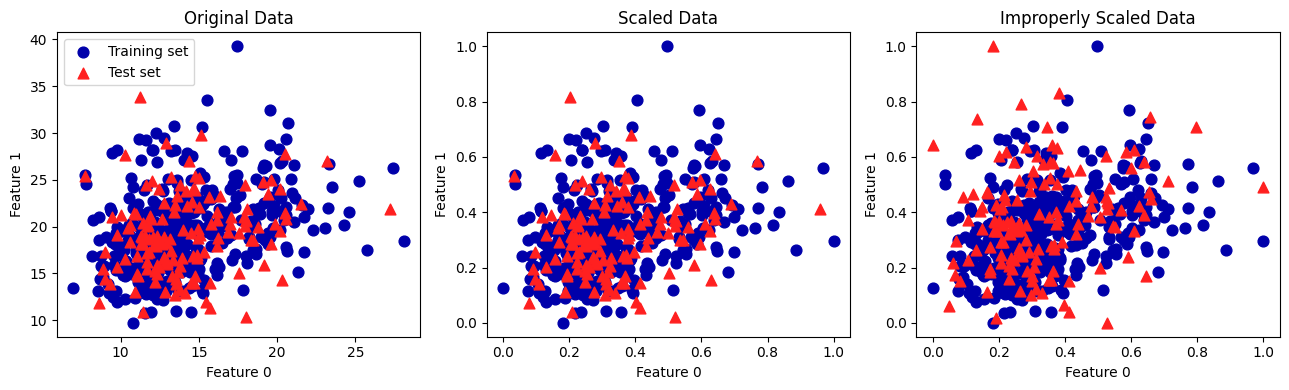

In [29]:
import mglearn
import matplotlib.pyplot as plt

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

Demonstrates the accuracy of the model without scaling.

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))


# use the standard scaler to scale the training and test partitions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# instantiate the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=0)

# when fitting the model, fit the model on the X_train scaled data, but do not scale the target variable of y_train
svm.fit(X_train_scaled, y_train) 

# make evaluate the accuracy of the scaled data
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))


Test set accuracy: 0.94
Scaled test set accuracy: 0.96


Explore using the MinMaxScaler().

In [31]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


#### Discussion Question #1

Using the Breast Cancer Dataset, what would happen to the model if we used the RobustScaler() or the Normalizer() instead of the StandardScaler().

## Chapter 4

The purpose of this task is to cover feature engineering. Feature engineering is simply selecting, processing, and preparing the right data to optimize a model's performance.

In [32]:
from sklearn.feature_selection import SelectPercentile
import numpy as np

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


Train a logisted regression using only the selected data. Select the top 50% features.

In [46]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with only selected features: 0.919


C:\Users\drsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Use a model to select the most relevant feature.

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
X_train_selected_rf = select.fit_transform(X_train, y_train)
x_test_selected_rf = select.fit_transform(X_test, y_test)

In [35]:
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\drsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9192982456140351

Create a simple model using the breast cancer data.

In [36]:
lr = LogisticRegression().fit(X_train_selected_rf, y_train)

lr.score(x_test_selected_rf, y_test)

C:\Users\drsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3543859649122807

Iterative feature selection.

([], [])

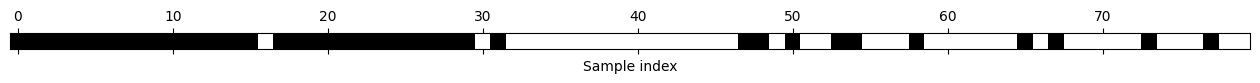

In [37]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

Iterative feature extraction interates through 100 different decision trees to identify the features that improve the models performance the most and selects the model with the best score.

In [49]:
from sklearn.metrics import classification_report


X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

model = LogisticRegression().fit(X_train_rfe, y_train)
model.score(X_test_rfe, y_test)

C:\Users\drsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9298245614035088

#### Discussion Question #3

What are the primary advantages and disadvantages of using iterative feature extraction techniques like Recursive Feature Elimination (RFE) compared to other methods?

#### Discussion Question #4

How do you determine the optimal number of features to select when using RFE? What are the trade-offs involved in selecting a smaller or larger feature subset?

## Chapter 5 

The most common way to evaluate a model is to print a "Classification report" using sklearn. The classification report shows the precision, recall, F1 macro, and accuracy score. As a word of caution, it is important to explicitly define the y_pred and the y_true values because the order entered in the classification can impact the model's results (see example below).


In [54]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_rfe) 

print(classification_report(y_true=y_test, y_pred=y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       101
           1       0.96      0.93      0.95       184

    accuracy                           0.93       285
   macro avg       0.92      0.93      0.92       285
weighted avg       0.93      0.93      0.93       285



### Discussion Question # 5 

Given the total support of 285 rows of test data, 101 rows predictions in the negative class, and 184 rows of data, would you say that class imbalance is a concern in the breast cancer data? If so, what could be done to address the class imbalance?

### Discussion Question # 6
Given the distribution of the benign and malignant predictions in the breast cancer data, what does the following metric's from Chapter 5 tell us about the data:
+  precision
+  recall
+  F1 Macro

Does the model do a better job predicting benign or malignant tumors using the validation data? Given the metrics for precision and recall, would this model be a better tool to diagnose breast cancer or confirm breast cancer? Please explain discuss the possible use cases in terms of false positives and false negatives using the precision and recall metrics.